# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [74]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [75]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City '" + city.title() + "' not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | les cayes
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | luau
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | nadym
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | corumba
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | pontianak
Processing Record 17 of Set 1 | jingzhou
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | gobabis
Processing Record 23 of Set 1 | st.

In [86]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [87]:
# Display sample data
city_data_df.head()

## NOT IN ORIGINAL STARTERCODE: I ADDED TO GET THE DATE CORRECT ON SCATTERPLOTS
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],)).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,les cayes,18.2000,-73.7500,26.50,76,77,1.52,HT,1970-01-01
1,bilibino,68.0546,166.4372,-19.65,95,46,1.03,RU,1970-01-01
2,luau,-10.7073,22.2247,18.44,86,74,1.41,AO,1970-01-01
3,qaqortoq,60.7167,-46.0333,0.30,81,100,1.67,GL,1970-01-01
4,olonkinbyen,70.9221,-8.7187,-0.23,71,100,2.94,SJ,1970-01-01


In [88]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

OSError: Cannot save file into a non-existent directory: 'output_data'

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

TypeError: 'str' object is not callable

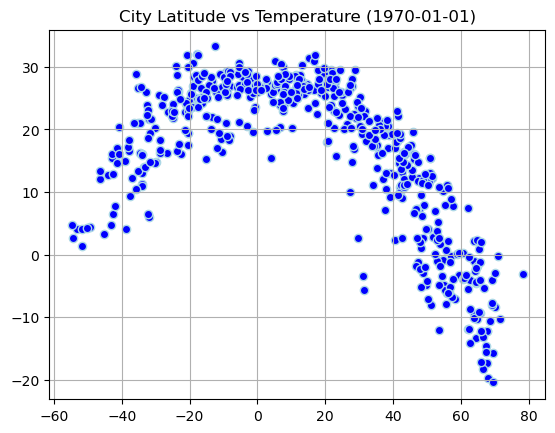

In [81]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', 
            facecolors='blue', edgecolors='lightblue')

# Incorporate the other graph properties
plt.grid()
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature°C")
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

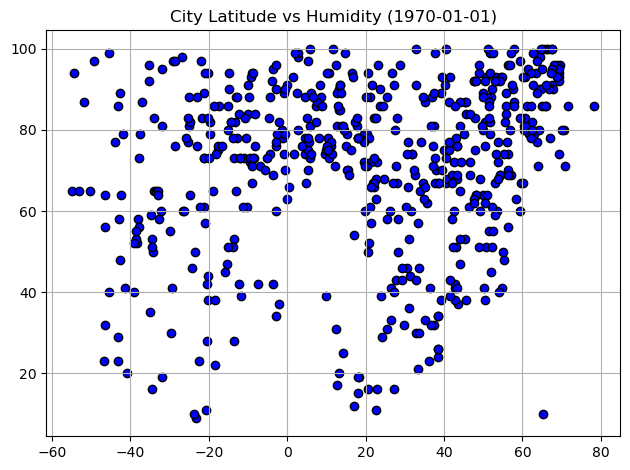

In [46]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o',
           facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs Humidity ({date})")
plt.xlabel=("Latitude")
plt.ylabel=("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

TypeError: 'str' object is not callable

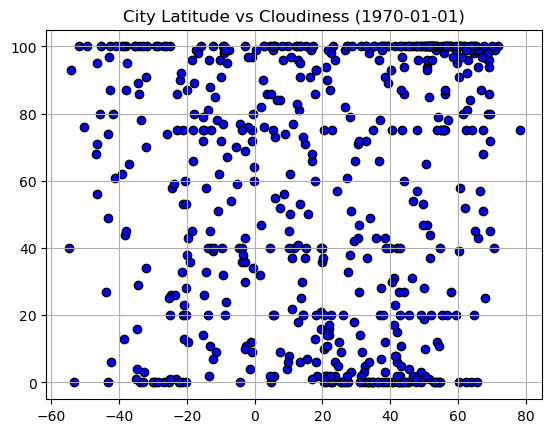

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o",
           facecolors="b", edgecolors="k")
# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

TypeError: 'str' object is not callable

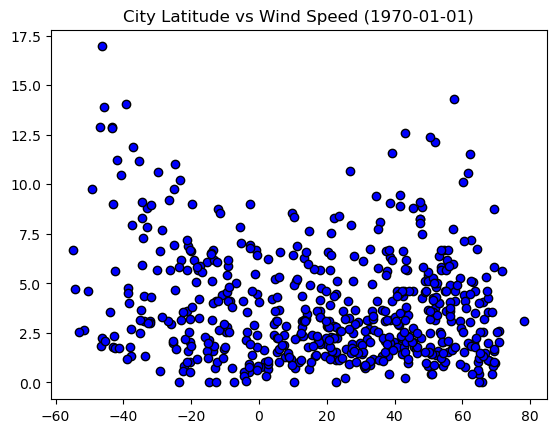

In [50]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o",
           facecolor="b", edgecolors="k")
# Incorporate the other graph properties
plt.grid
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


TypeError: 'str' object is not callable

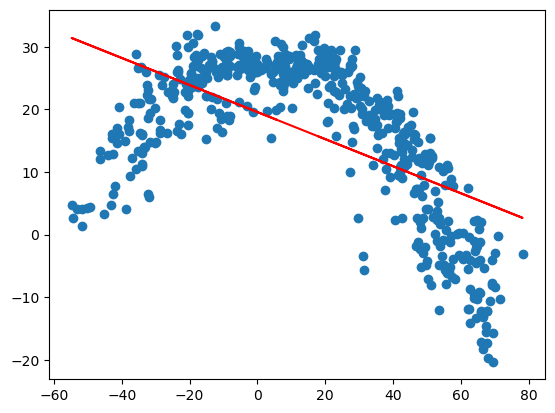

In [91]:
# Define a function to create Linear Regression plots
#Latitude vs Max Temp 
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,260), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {rvalue}")
plt.tight_layout
plt.show

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nampa,43.5407,-116.5635,7.86,37,0,5.66,US,1970-01-01
4,longyearbyen,78.2186,15.6401,-3.09,86,75,3.09,SJ,1970-01-01
7,prince rupert,54.3161,-130.3201,7.83,69,0,2.06,CA,1970-01-01
8,hasilpur,29.7122,72.5553,23.74,32,66,2.01,PK,1970-01-01
10,college,64.8569,-147.8028,-1.72,86,100,0.45,US,1970-01-01


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mamanguape,-6.8386,-35.1261,26.18,71,54,5.01,BR,1970-01-01
2,edinburgh of the seven seas,-37.0676,-12.3116,12.93,87,65,11.86,SH,1970-01-01
3,ushuaia,-54.8000,-68.3000,5.81,65,40,6.69,AR,1970-01-01
5,port elizabeth,-33.9180,25.5701,12.40,65,0,3.09,ZA,1970-01-01
6,grytviken,-54.2811,-36.5092,2.32,94,93,4.71,GS,1970-01-01


###  Temperature vs. Latitude Linear Regression Plot

In [92]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df["Max Temp"], (10,-30))

# Save the figure
plt.savefig("output_data/LinRegress_NH_Lat_vs_MaxTemp")

NameError: name 'st' is not defined

In [ ]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df['Lat'].rename("Latitude"), southern_hemi_df["Max Temp"], (-30,8))

# Save the figure
plt.savefig("output_data/LinRegress_SH_Lat_vs_MaxTemp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
linear_regress(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df["Humidity"], (50,40))

# Save the figure
plt.savefig("output_data/LinRegress_NH_Lat_vs_Humidity")

In [ ]:
# Southern Hemisphere
linear_regress(southern_hemi_df['Lat'].rename("Latitude"), southern_hemi_df["Humidity"], (-20,50))

# Save the figure
plt.savefig("output_data/LinRegress_SH_Lat_vs_Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


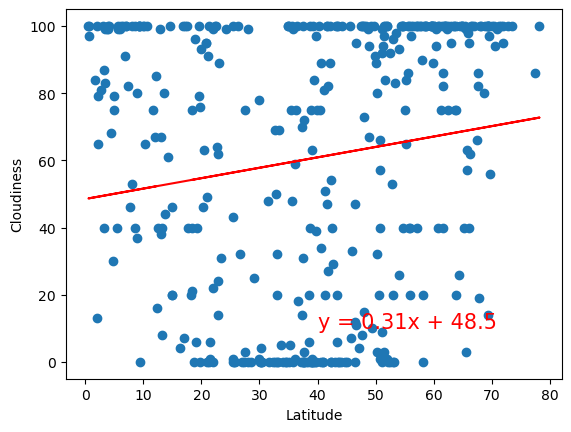

In [19]:
# Northern Hemisphere
linear_regress(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df["Cloudiness"], (42,50))

# Save the figure
plt.savefig("output_data/LinRegress_NH_Lat_vs_Cloudiness")

The r-value is: 0.02056735429994368


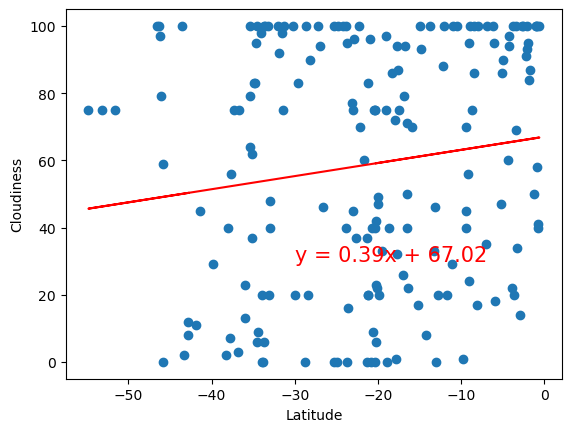

In [20]:
# Southern Hemisphere
linear_regress(southern_hemi_df['Lat'].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50,50))

# Save the figure
plt.savefig("output_data/LinRegress_SH_Lat_vs_Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


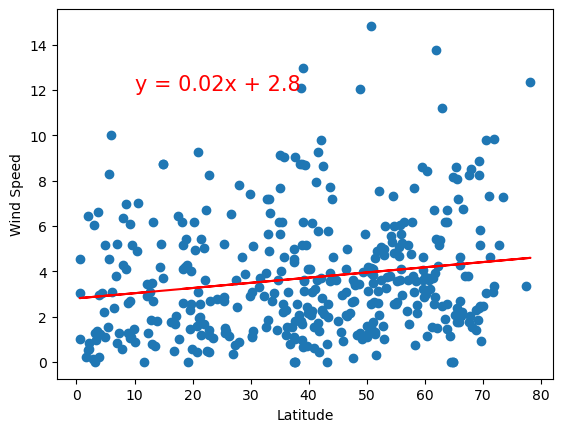

In [21]:
# Northern Hemisphere
linear_regress(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df["Wind Speed"], (10,12))

# Save the figure
plt.savefig("output_data/LinRegress_NH_Lat_vs_WindSpeed")

The r-value is: 0.062239040700515696


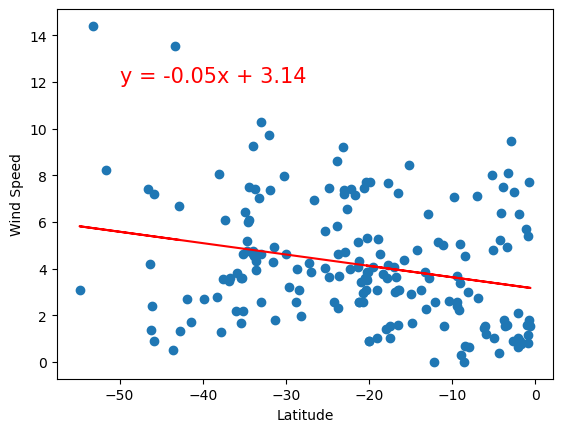

In [22]:
# Southern Hemisphere
linear_regress(southern_hemi_df['Lat'].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50,9))

# Save the figure
plt.savefig("output_data/LinRegress_SH_Lat_vs_WindSpeed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE